In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("./data.csv")

In [2]:
X = data.iloc[:,2:4]
y = data.iloc[:,1]
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1693)
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

def viz_cm(model, labels):

    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    pred = model.predict(np.array([X1.ravel(), X2.ravel()]).T)

    discreteCoder = LabelEncoder()
    pred = discreteCoder.fit_transform(pred)

    plt.contourf(X1, X2, pred.reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Classification')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend()
    plt.show()

In [4]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [5]:
from sklearn.naive_bayes import GaussianNB

bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [6]:
y_pred = bayes_classifier.predict(X_test)

In [7]:
y_pred

array(['B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B'],
      dtype='<U1')

In [8]:
y_test

array(['B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B'], dtype=object)

In [9]:
from sklearn.metrics import confusion_matrix
confMat = confusion_matrix(y_test,y_pred)
print_cm(confMat, ["Benign", "Malignant"])

                 Benign Malignant 
       Benign      76.0       9.0 
    Malignant       9.0      49.0 


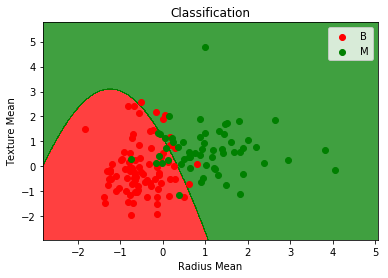

In [10]:
viz_cm(bayes_classifier,["Radius Mean", "Texture Mean"])

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state = 1693, max_depth = 5)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

In [12]:
dt_confMat = confusion_matrix(y_test, dt_pred)
print_cm(dt_confMat, ["Beningn", "Malignant"])

                Beningn Malignant 
      Beningn      79.0       6.0 
    Malignant       6.0      52.0 


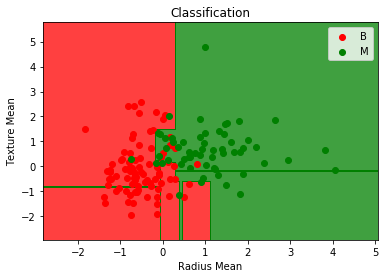

In [13]:
viz_cm(dt_classifier,["Radius Mean", "Texture Mean"])

In [14]:
from sklearn import tree
tree.export_graphviz(dt_classifier, out_file = "tree_dt.dot", feature_names = ["Radius Mean", "Treasure Mean"])

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rt_classifier = RandomForestClassifier(n_estimators = 1000, random_state = 1693, max_depth=5)
rt_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=1693, verbose=0,
            warm_start=False)

In [17]:
rt_pred = rt_classifier.predict(X_test)

In [18]:
rt_cm = confusion_matrix(y_test, rt_pred)
print_cm(rt_cm, ["Beningn", "Malignant"])

                Beningn Malignant 
      Beningn      79.0       6.0 
    Malignant       7.0      51.0 


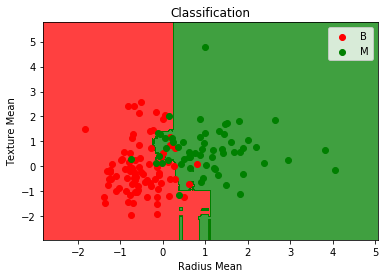

In [19]:
viz_cm(rt_classifier,["Radius Mean", "Texture Mean"])